#Initial exploration and rename

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [ ]:
df = pd.read_csv('Darknet.csv')
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [ ]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [ ]:
df["Protocol"].unique()

array([ 6, 17,  0])

In [ ]:
df['Protocol'].value_counts()

6     84321
17    56410
0       799
Name: Protocol, dtype: int64

In [ ]:
df['Down/Up Ratio'].nunique()

23

In [ ]:
df["Label"].unique()

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [ ]:
df.rename(columns = {"Label" : "Type", "Label.1" : "Subtype"}, inplace = True)
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [ ]:
df["Type"].unique()

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [ ]:
df["Subtype"].unique()

array(['AUDIO-STREAMING', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'File-transfer', 'P2P', 'Video-Streaming', 'Audio-Streaming',
       'Video-streaming', 'VOIP'], dtype=object)

In [ ]:
df['Type'].loc[(df['Type'] == 'Non-Tor') | (df['Type'] == 'NonVPN')] = 'Benign'
df['Type'].loc[(df['Type'] == 'Tor') | (df['Type'] == 'VPN')] = 'Darknet'

<ipython-input-26-b338b556449f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'].loc[(df['Type'] == 'Non-Tor') | (df['Type'] == 'NonVPN')] = 'Benign'
<ipython-input-26-b338b556449f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'].loc[(df['Type'] == 'Tor') | (df['Type'] == 'VPN')] = 'Darknet'


In [ ]:
df["Type"].unique()

array(['Benign', 'Darknet'], dtype=object)

In [ ]:
df["Subtype"].unique()

array(['AUDIO-STREAMING', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'File-transfer', 'P2P', 'Video-Streaming', 'Audio-Streaming',
       'Video-streaming', 'VOIP'], dtype=object)

In [ ]:
df.groupby("Type")["Subtype"].unique()

Type
Benign     [AUDIO-STREAMING, Browsing, Chat, Email, File-...
Darknet    [Audio-Streaming, Browsing, Chat, File-Transfe...
Name: Subtype, dtype: object

In [ ]:
df.groupby("Type")["Subtype"].nunique()

Type
Benign     11
Darknet     8
Name: Subtype, dtype: int64

In [ ]:
df["Subtype"].loc[df["Subtype"] == "AUDIO-STREAMING"] = "Audio-Streaming"
df["Subtype"].loc[df["Subtype"] == "File-transfer"] = "File-Transfer"
df["Subtype"].loc[df["Subtype"] == "Video-streaming"] = "Video-Streaming"

<ipython-input-31-b5eb2ac723e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Subtype"].loc[df["Subtype"] == "AUDIO-STREAMING"] = "Audio-Streaming"
<ipython-input-31-b5eb2ac723e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Subtype"].loc[df["Subtype"] == "File-transfer"] = "File-Transfer"
<ipython-input-31-b5eb2ac723e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Subtype"].loc[df["Subtype"] == "Video-streaming"

In [ ]:
df.groupby("Type")["Subtype"].unique()

Type
Benign     [Audio-Streaming, Browsing, Chat, Email, File-...
Darknet    [Audio-Streaming, Browsing, Chat, File-Transfe...
Name: Subtype, dtype: object

In [ ]:
df.groupby("Type")["Subtype"].nunique()

Type
Benign     8
Darknet    8
Name: Subtype, dtype: int64

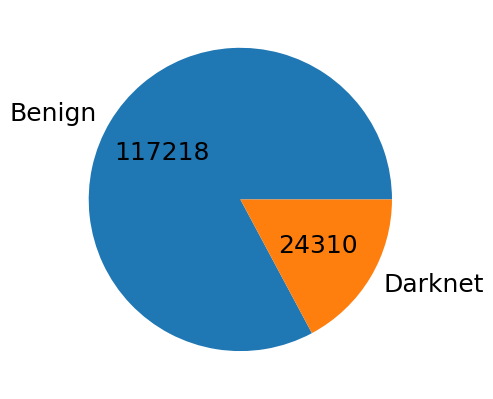

In [ ]:
samples = df.groupby("Type").count()
fig, ax = plt.subplots(figsize=(5,5))

samples.plot(y="Subtype", legend=None, ax=ax, shadow=False, kind="pie", fontsize=18,autopct=lambda x: int(samples["Subtype"].values.sum()*x/100))
plt.ylabel("")
plt.tight_layout()
plt.show()

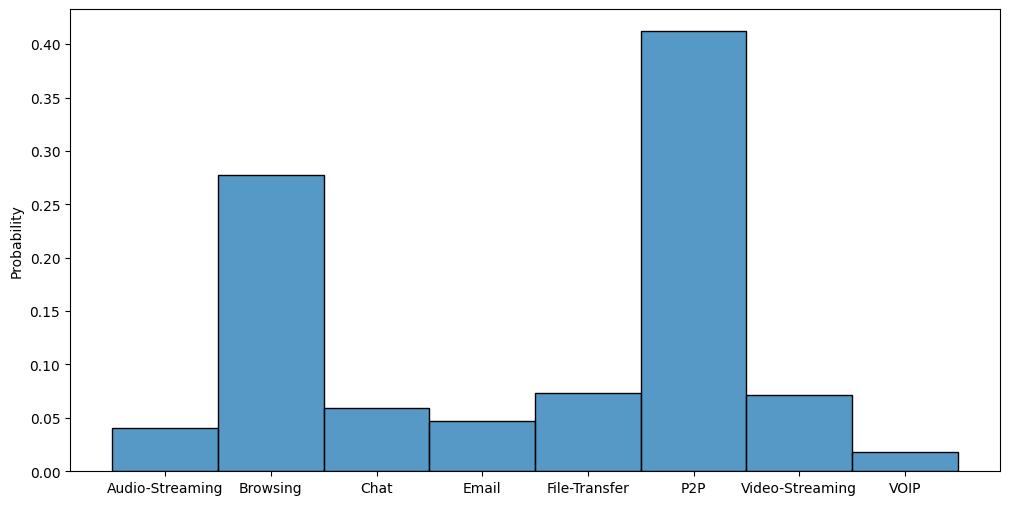

In [ ]:
# Type of traffic on Darknet
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['Type'] == "Benign"], x="Subtype", stat="probability")
plt.xlabel('')
plt.show()

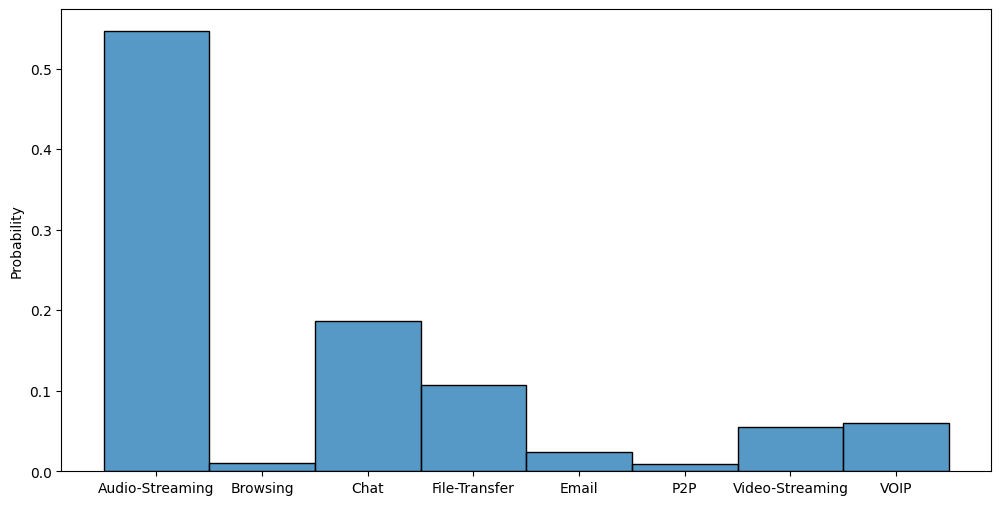

In [ ]:
# Type of traffic outside the Darknet
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['Type'] == "Darknet"], x="Subtype", stat="probability")
plt.xlabel('')
plt.show()

#Handling missing and infinity data

In [ ]:
is_na_cols = df.columns[df.isna().sum() > 0]
df.isna().sum()[is_na_cols]

Flow Bytes/s    47
dtype: int64

In [ ]:
df = df.dropna()
df.isna().sum()[is_na_cols]

Flow Bytes/s    0
dtype: int64

In [ ]:
print(df["Src IP"].unique())
print(df["Src IP"].nunique())

['10.152.152.11' '173.194.33.97' '74.125.28.189' ... '184.27.206.8'
 '191.232.139.4' '134.170.58.123']
3906


In [ ]:
print(df["Dst IP"].unique())
print(df["Dst IP"].nunique())

['216.58.220.99' '74.125.136.120' '173.194.65.127' ... '10.8.8.245'
 '202.118.1.81' '5.45.97.110']
7197


We define the real columns of the dataset, we are not including object type variables and the type subtype are also not included

In [ ]:
real_columns = ['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']
print(real_columns)


['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average

We can modify the columns with infinite values or with not a number values and codify the numbers columns in the same format

In [ ]:
df[real_columns] = df[real_columns].astype(np.float64)
df[real_columns] = df[real_columns].replace([np.inf, -np.inf], np.nan)
df[real_columns] = df[real_columns].dropna()

In [ ]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229.0,1.0,1.0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407.0,1.0,1.0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431.0,1.0,1.0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359.0,1.0,1.0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451.0,591.0,400.0,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Benign,Audio-Streaming


#Irrelevant attributes removal and numerical encoding

There's some columns that we can get rid off:

**Flow ID:**  Only contains a single attribute, dont bring value to the model


**Timestamp:** The time of the packet, dont bring value to the model


Speaking in terms of networking and security, the use of ips may not bring any value to the classification model; if an attacker knows that the traffic has been filtered by the IP address, he could use a tool to change it.

Also as we have many unique ip's, the use of them can cause overfitting in the model so we can delete **Src IP** and **Dst IP**




In [ ]:
model_samples = df.copy()

del model_samples['Flow ID']
del model_samples['Timestamp']
del model_samples['Src IP']
del model_samples['Dst IP']

In the context of a classification model, numerical feature scaling using StandardScaler can significantly improve model performance by ensuring that features contribute equally to the final prediction, regardless of their different original scales. This can help the model converge faster during training and make more accurate and stable predictions.


In [ ]:
scaler = StandardScaler().fit(model_samples[real_columns])
model_samples[real_columns] = scaler.transform(model_samples[real_columns])
model_samples[real_columns].head()


,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min
0,-0.546508,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.345303,-0.095141,-0.061219,0.589647
1,-0.546503,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.335704,-0.095141,-0.061219,0.589647
2,-0.546502,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.329439,-0.095141,-0.061219,0.589647
3,-0.546504,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.333582,-0.095141,-0.061219,0.589647
4,-0.263585,0.184194,0.071741,-0.014801,-0.027116,-0.120075,-0.498852,0.179861,-0.247304,0.340530,...,0.164343,-0.036900,-0.634075,0.158678,0.0,-0.368398,-0.396835,0.073134,0.305786,0.589647


In [ ]:
model_samples.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype
0,57158,443,6,-0.546508,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
1,57159,443,6,-0.546503,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
2,57160,443,6,-0.546502,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
3,49134,443,6,-0.546504,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
4,34697,19305,6,-0.263585,0.184194,0.071741,-0.014801,-0.027116,-0.120075,-0.498852,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Benign,Audio-Streaming


In [ ]:
columns_with_nan = model_samples.columns[model_samples.isna().any()].tolist()
print("Columns with  NaN:", columns_with_nan)

nan_counts = model_samples.isna().sum()
print("Count NaN column:")
print(nan_counts)

Columns with  NaN: ['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/

In [ ]:
# Calcular la media de cada columna
column_means = model_samples.mean()

# Reemplazar NaN por la media de cada columna
model_samples = model_samples.fillna(column_means)


<ipython-input-48-4497bae0b389>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = model_samples.mean()


#Correlation

In [ ]:
from sklearn.preprocessing import LabelEncoder

model_samples_encoded = model_samples.copy()

# Codificación de la columna 'Type'
label_encoder = LabelEncoder()
model_samples_encoded['Type_encoded'] = label_encoder.fit_transform(model_samples['Type'])
model_samples_encoded

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype,Type_encoded
0,57158,443,6,-0.546508,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,0
1,57159,443,6,-0.546503,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,0
2,57160,443,6,-0.546502,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,0
3,49134,443,6,-0.546504,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,0
4,34697,19305,6,-0.263585,0.184194,0.071741,-0.014801,-0.027116,-0.120075,-0.498852,...,0,0,0,1.437760e+15,3.117718e+06,1.437760e+15,1.437760e+15,Benign,Audio-Streaming,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,55219,5355,17,-0.535704,-0.063418,-0.045242,-0.034631,-0.028574,-0.287888,0.203661,...,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Darknet,VOIP,1
141526,64207,5355,17,-0.535710,-0.063418,-0.045242,-0.034631,-0.028574,-0.287888,0.203661,...,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Darknet,VOIP,1
141527,61115,5355,17,-0.535429,-0.063418,-0.045242,-0.034631,-0.028574,-0.287888,0.203661,...,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Darknet,VOIP,1
141528,64790,5355,17,-0.535703,-0.063418,-0.045242,-0.034631,-0.028574,-0.287888,0.203661,...,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Darknet,VOIP,1


In [ ]:
def multi_corr(col1, col2="Type", df=model_samples_encoded):
    '''
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "label" afetr applying log1p to it.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [ ]:
def corr(col1, col2="Type", df=model_samples_encoded):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

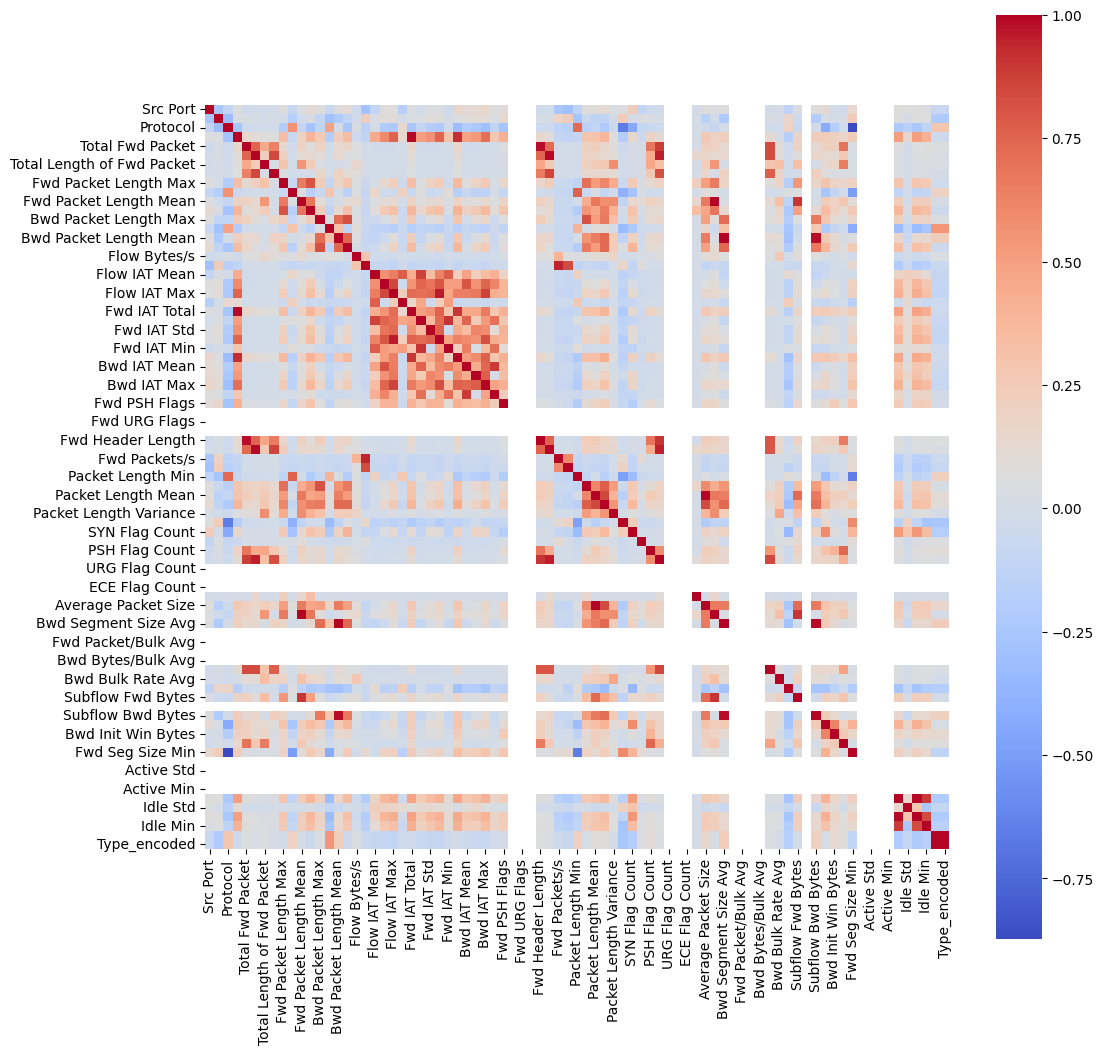

In [ ]:
method = "pearson"

numeric_features = model_samples_encoded.select_dtypes(include=[np.number]).columns.tolist()

numeric_features.append('Type_encoded')

corr_mat = model_samples_encoded[numeric_features].corr(method=method)

# Visualizar heatmap sin valores numéricos
plt.figure(figsize=(12, 12))
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
plt.show()


In [ ]:
limit = 0.9

correlations = []

columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= limit:
            correlation_tuple = (columns[i], columns[j], corr_mat.iloc[i, j])
            correlations.append(correlation_tuple)


sorted_correlations = sorted(correlations, key=lambda x: x[2], reverse=True)


for correlation in sorted_correlations:
    print(f"{correlation[0]:20s} {correlation[1]:20s} {correlation[2]}")


Fwd Packet Length Mean Fwd Segment Size Avg 1.0
Bwd Packet Length Mean Bwd Segment Size Avg 1.0
Type_encoded         Type_encoded         1.0
Packet Length Mean   Average Packet Size  0.993324146931517
Total Bwd packets    Bwd Header Length    0.9912961554778753
Idle Mean            Idle Max             0.9877659976966114
Flow Duration        Fwd IAT Total        0.9872215610533858
Total Fwd Packet     Fwd Header Length    0.9809573463708687
Bwd Packet Length Mean Subflow Bwd Bytes    0.9806287630294114
Bwd Segment Size Avg Subflow Bwd Bytes    0.9806287630294114
Flow IAT Max         Fwd IAT Max          0.9615373545203069
Bwd Header Length    ACK Flag Count       0.9519638017464106
Total Bwd packets    ACK Flag Count       0.9516464929322144
Flow Packets/s       Fwd Packets/s        0.9433644254943
Flow Duration        Bwd IAT Total        0.9164523285969309
Fwd IAT Mean         Fwd IAT Min          0.9059904078714711
Fwd Packet Length Mean Subflow Fwd Bytes    0.9006392865512165
Fwd 

As we obtained many high values with the correlation, we will use another method to calculate the columns that can contribute the most to the model.

#Feature Importance

In [ ]:
from sklearn.model_selection import train_test_split

# Division for 'Type' (binary classification)
X_type = model_samples_encoded[real_columns]
y_type = model_samples_encoded['Type_encoded']  # Variable objetivo 'Type'



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo
model = RandomForestClassifier()
model.fit(X_type, y_type)

# Obtener la importancia de las características
importances = model.feature_importances_


In [ ]:
feat_importances = pd.Series(importances, X_type[real_columns].columns[0:len(X_type[real_columns].columns)])
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances

Flow IAT Min             0.068199
Bwd Packet Length Min    0.060658
Fwd Seg Size Min         0.059129
Flow Bytes/s             0.050695
Fwd Header Length        0.042613
                           ...   
Subflow Bwd Packets      0.000000
ECE Flag Count           0.000000
Bwd PSH Flags            0.000000
Fwd URG Flags            0.000000
URG Flag Count           0.000000
Length: 68, dtype: float64

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances2 = mutual_info_classif(X_type, y_type)


In [ ]:
feat_importances2 = pd.Series(importances2, X_type[real_columns].columns[0:len(X_type[real_columns].columns)])
feat_importances2 = feat_importances2.sort_values(ascending=False)
feat_importances2

Packet Length Mean     0.221195
Flow IAT Max           0.218693
Average Packet Size    0.217527
Packet Length Std      0.216264
Flow Duration          0.216121
                         ...   
Fwd Packet/Bulk Avg    0.000000
Fwd Bytes/Bulk Avg     0.000000
Bwd PSH Flags          0.000000
Subflow Bwd Packets    0.000000
ECE Flag Count         0.000000
Length: 68, dtype: float64

For the first method using RandomForest we define the threshold between 0.03 and 0.07. With the other method to be greater than 0.2, we create a new dataset containing only the columns found with the highest importance, including only once if there are any repeated columns between the two methods.

In [ ]:
top_feat_importances = feat_importances.head(12)
top_feat_importances2 = feat_importances2.head(12)

common_columns = top_feat_importances.index.intersection(top_feat_importances2.index)
print("Common columns:", list(common_columns))

# Obtener todos los valores únicos en las columnas de feat_importances y feat_importances2
unique_columns = list(set(top_feat_importances.index.tolist() + top_feat_importances2.index.tolist()))
print("Unique columns:", unique_columns, len(unique_columns))


Common columns: ['Flow IAT Min', 'Flow IAT Max', 'Bwd Segment Size Avg']
Unique columns: ['Packet Length Variance', 'Packet Length Std', 'FWD Init Win Bytes', 'Flow IAT Min', 'Fwd Packets/s', 'Packet Length Max', 'Total Length of Bwd Packet', 'Flow Packets/s', 'Bwd Packet Length Max', 'Flow IAT Mean', 'Average Packet Size', 'Bwd Packet Length Min', 'Bwd Packets/s', 'Flow Duration', 'Bwd Segment Size Avg', 'Flow Bytes/s', 'Bwd Packet Length Mean', 'Fwd Seg Size Min', 'Fwd Header Length', 'Packet Length Mean', 'Flow IAT Max'] 21


We utilize columns with higher feature importances as they carry more predictive power, aiding the model's accuracy and reducing complexity by focusing on the most influential attributes, thus optimizing performance and enhancing predictive outcomes.

In [ ]:
# Division for 'Type' (Binary classification)
X_type = X_type[unique_columns]

X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X_type, y_type, test_size=0.2, random_state=42)

print("shape of X_train_type:", X_train_type.shape)
print("shape of X_test_type:", X_test_type.shape)
print("shape of y_train_type:", y_train_type.shape)
print("shape of y_test_type:", y_test_type.shape)

shape of X_train_type: (113186, 21)
shape of X_test_type: (28297, 21)
shape of y_train_type: (113186,)
shape of y_test_type: (28297,)


# KNN

In [ ]:
# Create KNN model with desired neighbors
model_KNN = KNeighborsClassifier(n_neighbors=3)

# Fit the model with training data
model_KNN.fit(X_train_type, y_train_type)

# Make predictions on the test set
y_pred = model_KNN.predict(X_test_type)

# Calculate the accuracy score
accuracy = accuracy_score(y_test_type, y_pred)
print(f'Model accuracy: {accuracy}')


Model accuracy: 0.9721525250026505


In [ ]:
# print classification report
print(classification_report(y_test_type, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     23429
           1       0.93      0.91      0.92      4868

    accuracy                           0.97     28297
   macro avg       0.95      0.95      0.95     28297
weighted avg       0.97      0.97      0.97     28297



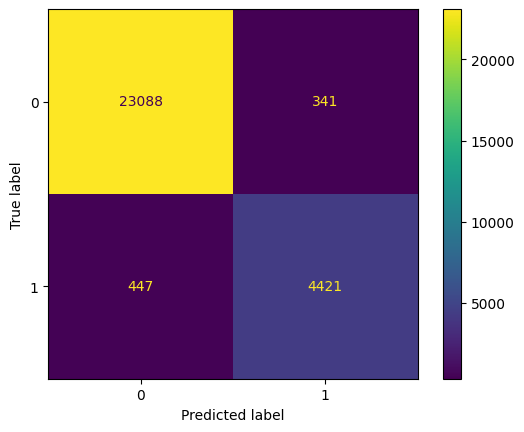

In [ ]:
# call confussion matrix
cm = confusion_matrix(y_test_type,y_pred, labels=model_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_KNN.classes_)
disp.plot()
plt.show()

The model achieved an accuracy of 97% in distinguishing between Benign (Class 0) and Darknet (Class 1) traffic. For the Benign class, the precision of 98% implies that among all instances classified as Benign, 98% were accurately identified. The recall of 99% indicates that 99% of all Benign instances were correctly predicted.

In the case of Darknet traffic, the precision and recall stand at 93% and 91%, respectively. This implies a slightly higher misclassification rate compared to Benign traffic. The weighted average accuracy across both classes is 97%, demonstrating the model's strong overall predictive ability.

The essential features determining the model's performance are **['Bwd Segment Size Avg', 'Fwd Packets/s', 'Packet Length Mean', 'Fwd Header Length', 'Flow Packets/s', 'Packet Length Max', 'Total Length of Bwd Packet', 'Fwd Seg Size Min', 'Average Packet Size', 'Bwd Packet Length Min', 'FWD Init Win Bytes', 'Flow IAT Max', 'Packet Length Variance', 'Flow IAT Mean', 'Flow Bytes/s', 'Bwd Packets/s', 'Packet Length Std', 'Bwd Packet Length Max', 'Flow Duration', 'Flow IAT Min', 'Bwd Packet Length Mean']**. Understanding these features better could further improve the model's performance, especially in reducing misclassifications in the Darknet class.

# Feature Importance for Subtype

In [ ]:
model_samples['Subtype'].unique()

array(['Audio-Streaming', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'P2P', 'Video-Streaming', 'VOIP'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
subtype_encoded = label_encoder.fit_transform(model_samples['Subtype'].values)
model_samples_subtype = model_samples
model_samples_subtype['Subtype_encoded'] = subtype_encoded
model_samples_subtype.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype,Subtype_encoded
0,57158,443,6,-0.546508,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,0
1,57159,443,6,-0.546503,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,0
2,57160,443,6,-0.546502,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,0
3,49134,443,6,-0.546504,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,0
4,34697,19305,6,-0.263585,0.184194,0.071741,-0.014801,-0.027116,-0.120075,-0.498852,...,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Benign,Audio-Streaming,0


In [ ]:
model_samples_subtype['Subtype_encoded'].unique()

array([0, 1, 2, 3, 4, 5, 7, 6])

In [ ]:
y_subtype = model_samples_subtype['Subtype_encoded']
model_rf = RandomForestClassifier()
model_rf.fit(X_type, y_subtype)
importances_rf = model_rf.feature_importances_

# Mutual Information
importances_mi = mutual_info_classif(X_type, y_subtype)

In [ ]:
feat_importances_subtype = pd.Series(importances_rf, X_type.columns[0:len(X_type.columns)])
feat_importances_subtype = feat_importances_subtype.sort_values(ascending=False)
feat_importances_subtype

Flow IAT Max                  0.093920
FWD Init Win Bytes            0.075080
Flow IAT Min                  0.074311
Flow Duration                 0.067532
Flow IAT Mean                 0.062014
Fwd Header Length             0.060104
Flow Bytes/s                  0.051202
Fwd Packets/s                 0.050724
Bwd Packets/s                 0.047041
Flow Packets/s                0.044181
Packet Length Max             0.039856
Average Packet Size           0.039330
Bwd Packet Length Min         0.038605
Bwd Segment Size Avg          0.037803
Fwd Seg Size Min              0.034936
Packet Length Std             0.034569
Packet Length Mean            0.033819
Bwd Packet Length Mean        0.033500
Packet Length Variance        0.031118
Total Length of Bwd Packet    0.027611
Bwd Packet Length Max         0.022743
dtype: float64

In [ ]:
feat_importances2_subtype = pd.Series(importances_mi, X_type.columns[0:len(X_type.columns)])
feat_importances2_subtype = feat_importances2_subtype.sort_values(ascending=False)
feat_importances2_subtype

Packet Length Mean            0.820545
Average Packet Size           0.812982
Flow IAT Max                  0.798758
Packet Length Max             0.766243
Flow Duration                 0.715888
Fwd Packets/s                 0.682244
Flow IAT Mean                 0.681001
Flow Packets/s                0.675705
Flow Bytes/s                  0.635112
Packet Length Std             0.614709
Packet Length Variance        0.608899
Flow IAT Min                  0.592854
Bwd Packets/s                 0.553204
Fwd Header Length             0.536263
Bwd Segment Size Avg          0.519837
Bwd Packet Length Mean        0.519296
Total Length of Bwd Packet    0.503952
Bwd Packet Length Max         0.480946
FWD Init Win Bytes            0.395451
Bwd Packet Length Min         0.394433
Fwd Seg Size Min              0.242111
dtype: float64

In [ ]:
top_feat_importances = feat_importances_subtype.head(12)
top_feat_importances2 = feat_importances2_subtype.head(12)

common_columns = top_feat_importances.index.intersection(top_feat_importances2.index)
print("Common columns:", list(common_columns))

unique_columns = list(set(top_feat_importances.index.tolist() + top_feat_importances2.index.tolist()))
print("Unique columns:", unique_columns, len(unique_columns))

Common columns: ['Flow IAT Max', 'Flow IAT Min', 'Flow Duration', 'Flow IAT Mean', 'Flow Bytes/s', 'Fwd Packets/s', 'Flow Packets/s', 'Packet Length Max', 'Average Packet Size']
Unique columns: ['Packet Length Variance', 'Bwd Packets/s', 'Flow Duration', 'Fwd Header Length', 'FWD Init Win Bytes', 'Packet Length Mean', 'Packet Length Std', 'Flow IAT Min', 'Flow Packets/s', 'Fwd Packets/s', 'Average Packet Size', 'Flow Bytes/s', 'Packet Length Max', 'Flow IAT Mean', 'Flow IAT Max'] 15


In [ ]:
X_type.head()

,Packet Length Variance,Packet Length Std,FWD Init Win Bytes,Flow IAT Min,Fwd Packets/s,Packet Length Max,Total Length of Bwd Packet,Flow Packets/s,Bwd Packet Length Max,Flow IAT Mean,...,Bwd Packet Length Min,Bwd Packets/s,Flow Duration,Bwd Segment Size Avg,Flow Bytes/s,Bwd Packet Length Mean,Fwd Seg Size Min,Fwd Header Length,Packet Length Mean,Flow IAT Max
0,-0.069188,-0.522527,-0.345303,-0.160248,-0.054985,-0.335074,-0.028574,-0.042146,-0.292366,-0.365641,...,-0.409393,-0.009794,-0.546508,-0.446170,-0.067924,-0.446170,0.589647,-0.061303,-0.495341,-0.502709
1,-0.069188,-0.522527,-0.335704,-0.160217,-0.108639,-0.335074,-0.028574,-0.116448,-0.292366,-0.365616,...,-0.409393,-0.099102,-0.546503,-0.446170,-0.067924,-0.446170,0.589647,-0.061303,-0.495341,-0.502700
2,-0.069188,-0.522527,-0.329439,-0.160212,-0.112483,-0.335074,-0.028574,-0.121771,-0.292366,-0.365613,...,-0.409393,-0.105500,-0.546502,-0.446170,-0.067924,-0.446170,0.589647,-0.061303,-0.495341,-0.502699
3,-0.069188,-0.522527,-0.333582,-0.160225,-0.099410,-0.335074,-0.028574,-0.103667,-0.292366,-0.365623,...,-0.409393,-0.083740,-0.546504,-0.446170,-0.067924,-0.446170,0.589647,-0.061303,-0.495341,-0.502702
4,-0.065103,-0.248354,-0.396835,-0.160286,-0.176126,0.180363,-0.027116,-0.210249,0.340530,-0.364145,...,-0.409393,-0.212264,-0.263585,-0.376963,-0.062653,-0.376963,0.589647,0.186936,-0.118214,-0.498751


In [ ]:
# Division for 'Type' (Multiclass classification)
X_subtype = model_samples_subtype[unique_columns]

X_train_subtype, X_test_subtype, y_train_subtype, y_test_subtype = train_test_split(X_subtype, y_subtype, test_size=0.2, random_state=42)

print("shape of X_train_subtype:", X_train_subtype.shape)
print("shape of X_test_subtype:", X_test_subtype.shape)
print("shape of y_train_subtype:", y_train_subtype.shape)
print("shape of y_test_subtype:", y_test_subtype.shape)

shape of X_train_subtype: (113186, 15)
shape of X_test_subtype: (28297, 15)
shape of y_train_subtype: (113186,)
shape of y_test_subtype: (28297,)


#SVM

In [ ]:
from sklearn.svm import SVC

# Create SVM model
model_multiclass = SVC(kernel='linear')  #'linear', 'rbf', 'poly'

model_multiclass.fit(X_train_subtype, y_train_subtype)

y_pred_multiclass = model_multiclass.predict(X_test_subtype)

accuracy_multiclass = accuracy_score(y_test_subtype, y_pred_multiclass)
print(f'Precisión del modelo: {accuracy_multiclass}')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear un clasificador Random Forest
model_rf_multiclass = RandomForestClassifier(n_estimators=100)  # Puedes ajustar el número de árboles (n_estimators) según tu preferencia

# Entrenar el modelo multiclase con los datos de entrenamiento
model_rf_multiclass.fit(X_train_type, y_train_type)

# Realizar predicciones en el conjunto de prueba
y_pred_rf_multiclass = model_rf_multiclass.predict(X_test_type)

# Calcular la precisión del modelo
accuracy_rf_multiclass = accuracy_score(y_test_type, y_pred_rf_multiclass)
print(f'Precisión del modelo Random Forest: {accuracy_rf_multiclass}')
